In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# df = pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
# df.index.freq='MS'

In [4]:
# /content/drive/MyDrive/Foundation_Project_2_Term-5/monthly_milk_production.csv

In [62]:
df = pd.read_csv('C:/Users/Admin/OneDrive - LTI/Desktop/Foundation _project2/LSTM_Model-20231116T174833Z-001/LSTM_Model/oil_prod_data.csv',parse_dates=True)

In [63]:
df.head()

,Unnamed: 0,Date,Value,Status,Ticker,Description,Geography,Frequency,Dataset,Units,REF_AREA:Reference Area,ENERGY_PRODUCT:Energy product,FLOW_BREAKDOWN:Flow breakdown,UNIT_MEASURE:Unit of measure
0,0,1/1/2002,7150.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
1,1,2/1/2002,7071.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
2,2,3/1/2002,7096.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
3,3,4/1/2002,7074.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)
4,4,5/1/2002,7031.0,NaN,JODI_OIL.LD6EDLD6FCLD781.M.SA,Saudi Arabia - Crude oil; Production; Thousand...,Saudi Arabia,M,JODI_OIL,NaN,SA:Saudi Arabia,CRUDEOIL:Crude oil,INDPROD:Production,KBD:Thousand Barrels per day (kb/d)


In [64]:
df.columns

Index(['Unnamed: 0', 'Date', 'Value', 'Status', 'Ticker', 'Description',
       'Geography', 'Frequency', 'Dataset', 'Units', 'REF_AREA:Reference Area',
       'ENERGY_PRODUCT:Energy product', 'FLOW_BREAKDOWN:Flow breakdown',
       'UNIT_MEASURE:Unit of measure'],
      dtype='object')

In [65]:
# Select specific columns and create a new DataFrame

df_new = df[['Geography', 'ENERGY_PRODUCT:Energy product', 'Date', 'Value']]

In [66]:
df_new=df_new[df_new['Geography'] == 'United States']

In [67]:
df_new['Geography'].unique()

array(['United States'], dtype=object)

In [68]:
df_new['ENERGY_PRODUCT:Energy product'].unique()

array(['CRUDEOIL:Crude oil', 'NGL:NGL', 'OTHERCRUDE:Other'], dtype=object)

In [69]:
df_new['Geography'].nunique()

1

In [70]:
# Rename columns
df_new.rename(columns={'Date': 'Month', 'Value': 'US Total',
                       'ENERGY_PRODUCT:Energy product':'Product_type','Geography':'Country'}, inplace=True)

In [71]:
df_new['Product_type'] = df_new['Product_type'].apply(lambda x: x.split(':')[1])

In [72]:
# Convert 'Date' column to datetime
df_new['Month'] = pd.to_datetime(df_new['Month'])

In [73]:
df_new.dtypes

Country                 object
Product_type            object
Month           datetime64[ns]
US Total               float64
dtype: object

In [74]:
# Reset the index to start from 0
df_new.reset_index(drop=True, inplace=True)

In [75]:
df_new.head()

,Country,Product_type,Month,US Total
0,United States,Crude oil,2002-01-01,5848.0
1,United States,Crude oil,2002-02-01,5871.0
2,United States,Crude oil,2002-03-01,5883.0
3,United States,Crude oil,2002-04-01,5859.0
4,United States,Crude oil,2002-05-01,5924.0


In [76]:
df_new.to_csv('US_Crude_Oil_Production.csv', index=False)

## **Create Final dataset for both Crude,NGL & Other**

In [77]:
df_new.head()

,Country,Product_type,Month,US Total
0,United States,Crude oil,2002-01-01,5848.0
1,United States,Crude oil,2002-02-01,5871.0
2,United States,Crude oil,2002-03-01,5883.0
3,United States,Crude oil,2002-04-01,5859.0
4,United States,Crude oil,2002-05-01,5924.0


## **Create filter dataset for Crude**

In [78]:
df_crude=df_new[df_new['Product_type']=='Crude oil']

In [79]:
df_crude.head()

,Country,Product_type,Month,US Total
0,United States,Crude oil,2002-01-01,5848.0
1,United States,Crude oil,2002-02-01,5871.0
2,United States,Crude oil,2002-03-01,5883.0
3,United States,Crude oil,2002-04-01,5859.0
4,United States,Crude oil,2002-05-01,5924.0


In [80]:
# Remove extra colmns

df_crude.drop(['Country','Product_type'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25028\2954158748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crude.drop(['Country','Product_type'],axis=1,inplace=True)


In [81]:
# Fill null values in case of NaN

df_crude.fillna(method='bfill',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25028\4124740243.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_crude.fillna(method='bfill',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_25028\4124740243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crude.fillna(method='bfill',inplace=True)


In [82]:
df_crude.columns = ["ds","y"]

In [83]:
df_crude.head()

,ds,y
0,2002-01-01,5848.0
1,2002-02-01,5871.0
2,2002-03-01,5883.0
3,2002-04-01,5859.0
4,2002-05-01,5924.0


In [84]:
# Check if the the data is set up in proper format and then start modeling/forecasting.
df_crude.dtypes

ds    datetime64[ns]
y            float64
dtype: object

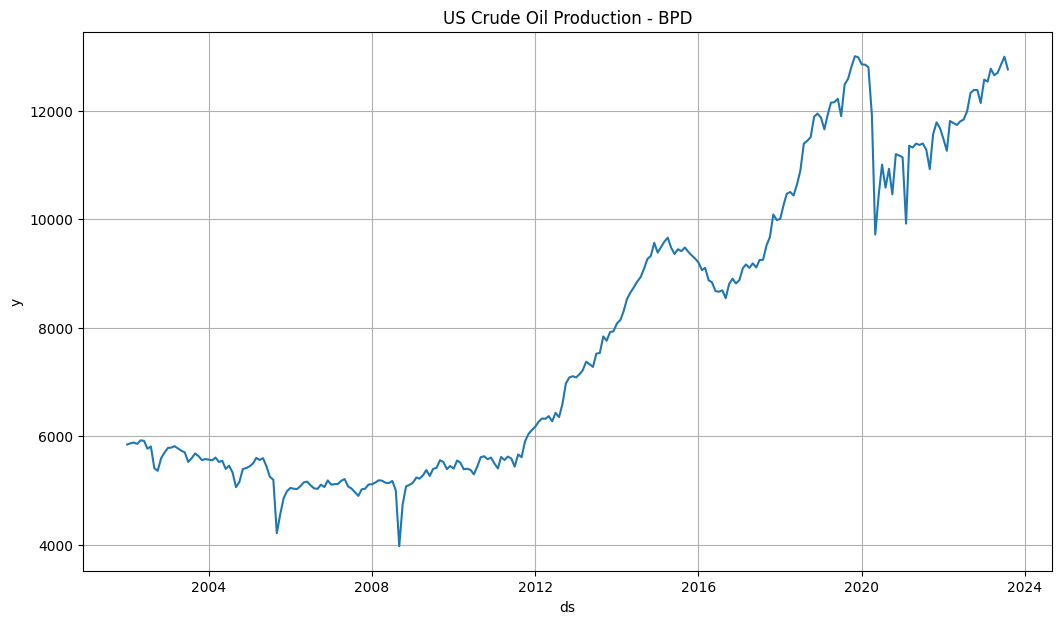

In [85]:
#Visualize the dataframe i.e. Canadian total production in BPD
plt.figure(figsize=(12.5,7))
sns.lineplot(data=df_crude, x="ds", y="y")
plt.title("US Crude Oil Production - BPD")
plt.grid(True)
plt.show()

### **Checking for missing data**
`pandas.isna()` returns `True` or `False` for every record in the dataframe. True indicates that at a certain position in the dataset, a value is missing. The output of `isna()` is a DataFrame, so we can aggregate the values using `sum` to retrieve the total number of missing values per column.

In [86]:
df_crude.isna().sum()

ds    0
y     0
dtype: int64

In [87]:
df_crude[df_crude['y'].isna()>0]

,ds,y


There are no missing values in the dataset

### Which year/month do we have data from?


In [88]:
dt = pd.to_datetime(df_crude.ds)
dt.groupby([dt.dt.year, dt.dt.month]).count()

ds    ds
2002  1     1
      2     1
      3     1
      4     1
      5     1
           ..
2023  4     1
      5     1
      6     1
      7     1
      8     1
Name: ds, Length: 260, dtype: int64

In [89]:
df=df_crude

In [90]:
df.columns = ["Date","Production"]

<Axes: >

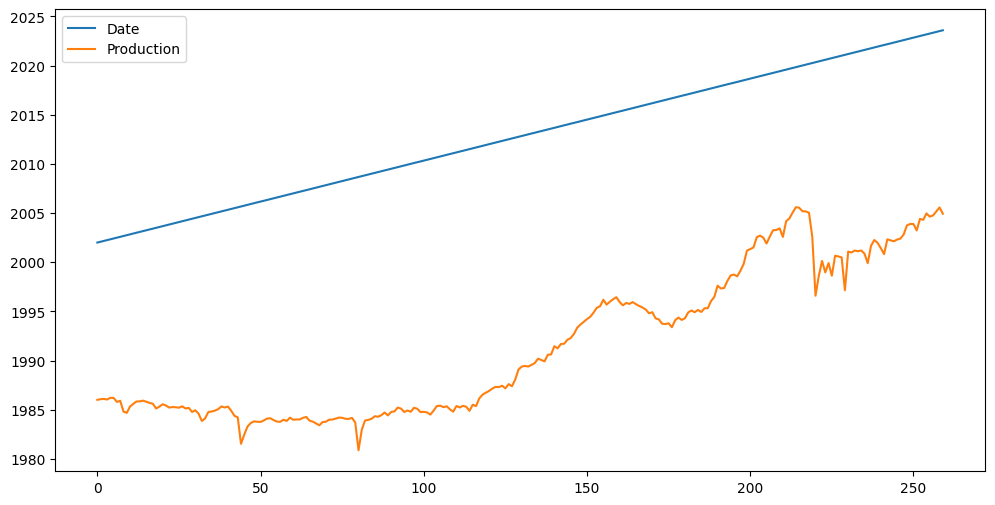

In [91]:
df.plot(figsize=(12,6))

# **Save the final data after Pre-Processing**

In [92]:
df.to_csv('C:/Users/Admin/OneDrive - LTI/Desktop/Foundation _project2/LSTM_Model-20231116T174833Z-001/LSTM_Model//US_CrudeOil_LSTM_Final.csv', index=False)

# **Model-Testing & Hyper Parameter Tuning**

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

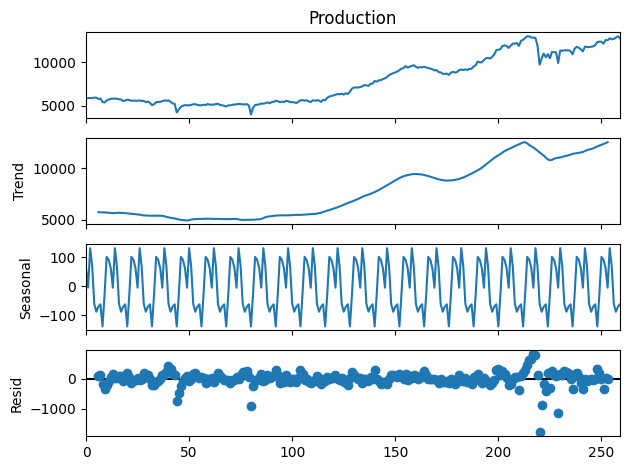

In [94]:
results = seasonal_decompose(df['Production'],period=12)
results.plot();

In [95]:
len(df)

260

In [96]:
df.dtypes

Date          datetime64[ns]
Production           float64
dtype: object

In [97]:
# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

In [98]:
df.head()

,Production
Date,
2002-01-01,5848.0
2002-02-01,5871.0
2002-03-01,5883.0
2002-04-01,5859.0
2002-05-01,5924.0


In [99]:
df.tail()

,Production
Date,
2023-04-01,12650.0
2023-05-01,12694.0
2023-06-01,12844.0
2023-07-01,12991.0
2023-08-01,12758.0


In [100]:
train = df.iloc[0:228]
test = df.iloc[228:260]

In [101]:
train.head(),train.tail()

(            Production
 Date                  
 2002-01-01      5848.0
 2002-02-01      5871.0
 2002-03-01      5883.0
 2002-04-01      5859.0
 2002-05-01      5924.0,
             Production
 Date                  
 2020-08-01     10579.0
 2020-09-01     10926.0
 2020-10-01     10456.0
 2020-11-01     11196.0
 2020-12-01     11172.0)

In [102]:
test.head(),test.tail()

(            Production
 Date                  
 2021-01-01     11137.0
 2021-02-01      9916.0
 2021-03-01     11351.0
 2021-04-01     11318.0
 2021-05-01     11390.0,
             Production
 Date                  
 2023-04-01     12650.0
 2023-05-01     12694.0
 2023-06-01     12844.0
 2023-07-01     12991.0
 2023-08-01     12758.0)

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [104]:
df.head(),df.tail()

(            Production
 Date                  
 2002-01-01      5848.0
 2002-02-01      5871.0
 2002-03-01      5883.0
 2002-04-01      5859.0
 2002-05-01      5924.0,
             Production
 Date                  
 2023-04-01     12650.0
 2023-05-01     12694.0
 2023-06-01     12844.0
 2023-07-01     12991.0
 2023-08-01     12758.0)

In [50]:
# scaler.fit(train)
# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

In [51]:
# scaled_train[:10]

In [53]:
pip install keras


  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install --upgrade tensorflow



  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl.metadata (5.1 kB)
Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [111]:
!pip install --upgrade tensorflow



  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl.metadata (5.1 kB)
Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [108]:
from keras.preprocessing.sequence import TimeseriesGenerator

ModuleNotFoundError: No module named 'tensorflow.python'

In [57]:
# define generator

train_array = train.to_numpy()
test_array = test.to_numpy()

n_input = 3
n_features = 1
generator = TimeseriesGenerator(train_array, train_array, length=n_input, batch_size=1)

NameError: name 'TimeseriesGenerator' is not defined

In [52]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[5848. 5871. 5883.]
Predict this y: 
 [[5859.]]


In [53]:
X.shape

(1, 3, 1)

In [54]:
# We do the same thing, but now instead for 12 months , we will train 228 months
n_input = 36
generator = TimeseriesGenerator(train_array, train_array, length=n_input, batch_size=1)

In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [56]:
#?LSTM

In [57]:
# define model
model = Sequential()
model.add(LSTM(160, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 160)               103680    
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 103841 (405.63 KB)
Trainable params: 103841 (405.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
192/192 [==============================] - 5s 17ms/step - loss: 550993536.0000
Epoch 2/50
192/192 [==============================] - 3s 18ms/step - loss: 276008480.0000
Epoch 3/50
192/192 [==============================] - 3s 17ms/step - loss: 380210560.0000
Epoch 4/50
192/192 [==============================] - 3s 17ms/step - loss: 195478128.0000
Epoch 5/50
192/192 [==============================] - 3s 17ms/step - loss: 4193943.7500
Epoch 6/50
192/192 [==============================] - 3s 18ms/step - loss: 6134402.5000
Epoch 7/50
192/192 [==============================] - 3s 18ms/step - loss: 50787796.0000
Epoch 8/50
192/192 [==============================] - 4s 19ms/step - loss: 2103822.2500
Epoch 9/50
192/192 [==============================] - 4s 19ms/step - loss: 5341224.5000
Epoch 10/50
192/192 [==============================] - 3s 18ms/step - loss: 3072312.0000
Epoch 11/50
192/192 [==============================] - 3s 17ms/step - loss: 29830328.0000
Epoch 12/50
192/192 

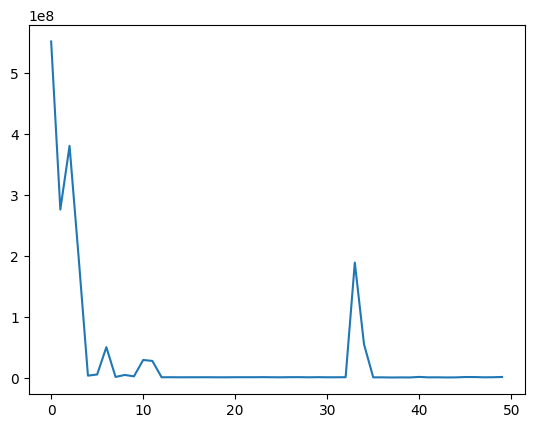

In [60]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [61]:
# train_array = train.to_numpy()
# test_array = test.to_numpy()

In [62]:
last_train_batch = train_array[-n_input:]

In [63]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [64]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 202ms/step


array([[11901.557]], dtype=float32)

In [65]:
test_array = test.to_numpy()

In [66]:
test_array[0]

array([11137.])

In [67]:
test_predictions = []

first_eval_batch = train_array[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


In [68]:
test_predictions

[array([11901.557], dtype=float32),
 array([11966.354], dtype=float32),
 array([12009.384], dtype=float32),
 array([12042.143], dtype=float32),
 array([12095.616], dtype=float32),
 array([12156.826], dtype=float32),
 array([12197.162], dtype=float32),
 array([12231.496], dtype=float32),
 array([12257.69], dtype=float32),
 array([12304.918], dtype=float32),
 array([12303.009], dtype=float32),
 array([12247.555], dtype=float32),
 array([12200.159], dtype=float32),
 array([12186.354], dtype=float32),
 array([12212.636], dtype=float32),
 array([12206.068], dtype=float32),
 array([12164.538], dtype=float32),
 array([12145.52], dtype=float32),
 array([12465.3], dtype=float32),
 array([12287.824], dtype=float32),
 array([10740.944], dtype=float32),
 array([12331.926], dtype=float32),
 array([10900.789], dtype=float32),
 array([11646.54], dtype=float32),
 array([12181.806], dtype=float32),
 array([11214.888], dtype=float32),
 array([10822.943], dtype=float32),
 array([11761.383], dtype=float32

In [69]:
test.head()

,Production
Date,
2021-01-01,11137.0
2021-02-01,9916.0
2021-03-01,11351.0
2021-04-01,11318.0
2021-05-01,11390.0


In [70]:
#true_predictions = scaler.inverse_transform(test_predictions)

In [71]:
type(test_predictions)

list

In [72]:
values_list = [arr[0] for arr in test_predictions]

In [73]:
values_list

[11901.557,
 11966.354,
 12009.384,
 12042.143,
 12095.616,
 12156.826,
 12197.162,
 12231.496,
 12257.69,
 12304.918,
 12303.009,
 12247.555,
 12200.159,
 12186.354,
 12212.636,
 12206.068,
 12164.538,
 12145.52,
 12465.3,
 12287.824,
 10740.944,
 12331.926,
 10900.789,
 11646.54,
 12181.806,
 11214.888,
 10822.943,
 11761.383,
 11942.44,
 12085.115,
 12152.009,
 12148.924]

In [74]:
test['Predictions'] = values_list

<ipython-input-74-33e5d2c2634d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = values_list


In [75]:
test.head()

,Production,Predictions
Date,,
2021-01-01,11137.0,11901.556641
2021-02-01,9916.0,11966.353516
2021-03-01,11351.0,12009.383789
2021-04-01,11318.0,12042.142578
2021-05-01,11390.0,12095.616211


<Axes: xlabel='Date'>

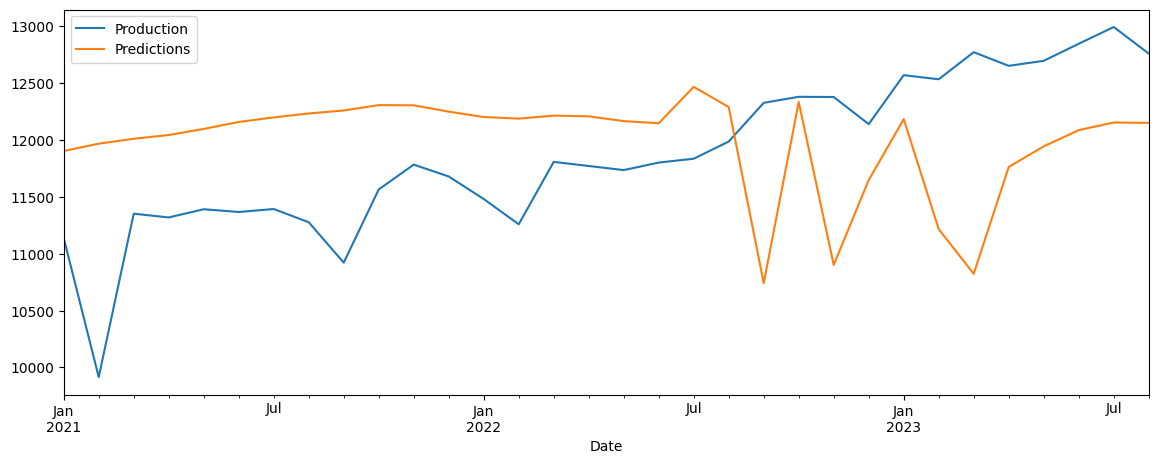

In [76]:
test.plot(figsize=(14,5))

In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

927.0716889957667


# **Evaluation Metrics**

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

# Assuming 'test' is your DataFrame and it contains two columns: 'Production' and 'Predictions'

# Calculate RMSE
rmse = sqrt(mean_squared_error(test['Production'], test['Predictions']))
print("RMSE: ", rmse)

# Calculate MAE
mae = mean_absolute_error(test['Production'], test['Predictions'])
print("MAE: ", mae)

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(test['Production'], test['Predictions'])
print("MAPE: ", mape, "%")


RMSE:  927.0716889957667
MAE:  809.9500122070312
MAPE:  6.894299312003079 %


# **Save the Model**

In [79]:
# Save the model to a file
with open('/content/drive/MyDrive/Foundation_Project_2_Term-5/US_Crude_LSTM_Model.pkl', 'wb') as f:
    pickle.dump(model, f)

# **Load the Model**

In [80]:
# Load the model from the file
with open('/content/drive/MyDrive/Foundation_Project_2_Term-5/US_Crude_LSTM_Model.pkl', 'rb') as f:
    US_Crude_LSTM_model = pickle.load(f)

In [81]:
US_Crude_LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 160)               103680    
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 103841 (405.63 KB)
Trainable params: 103841 (405.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
